In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

# Building Portfolio Bins

In [2]:
BIN_COUNT = 5

long_bin, short_bin = BIN_COUNT-2,1
# long_bin, short_bin = BIN_COUNT-1,0


In [3]:
# prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','Support Vector Model Predict']).rename(columns={'Support Vector Model Predict':'prediction'})
prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','XGBoost Model Predict']).rename(columns={'XGBoost Model Predict':'prediction'})
# prediction_df = pd.read_csv('model_output_v2.csv', usecols= ['gvkey','year','Random Forest Model Predict']).rename(columns={'Random Forest Model Predict':'prediction'})


In [4]:
print(prediction_df.info())
prediction_df = prediction_df.groupby(['gvkey','year']).mean().reset_index()
# prediction_df['prediction'] /= 100
prediction_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gvkey       5363 non-null   int64  
 1   year        5363 non-null   int64  
 2   prediction  5363 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 125.8 KB
None


,gvkey,year,prediction
0,1048,2002,-1.373361
1,1075,2002,23.521587
2,1075,2003,12.279644
3,1075,2005,21.633581
4,1075,2011,7.134670


# .

In [5]:
# with open('gvkey_list.txt','w') as f:
#     [f.write(str(x)+'\n') for x in prediction_df.gvkey.unique()]

In [6]:
prediction_df = pd.pivot_table(data = prediction_df, columns = 'year', values='prediction', index = 'gvkey')#.fillna(0.0)
prediction_df

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
gvkey,,,,,,,,,,,,,,,,
1048,-1.373361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,23.521587,12.279644,NaN,21.633581,NaN,NaN,NaN,NaN,NaN,7.134670,1.714085,-0.112464,2.462459,1.800695,8.004808,NaN
1078,11.517018,-1.810523,NaN,NaN,13.079875,-4.289972,-5.633491,2.052025,NaN,NaN,NaN,14.057167,-0.703378,-24.174484,25.740616,NaN
1177,-36.166990,10.551895,NaN,NaN,2.676477,-5.450055,-9.090284,15.451061,NaN,NaN,NaN,8.632435,0.739147,3.876597,0.357409,NaN
1209,5.491604,12.554552,14.748277,-1.864820,-0.459243,-4.580987,-21.526066,13.568489,10.663823,-0.819495,-4.116549,6.523410,-4.698774,-2.757430,24.611220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.552524,2.091433,-15.972520,1.261036,NaN
189490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.680543,13.282955,NaN,NaN,NaN,NaN,NaN
189491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.334953,4.524364,11.711875,-6.615712,-13.991229,2.837468,NaN


In [7]:
lookup = dict()

def sorted_bins(arr, bins):
    x = arr.dropna()
    binned_x = pd.cut(x, bins, labels=[i for i in range(bins)])
    dict_binned_x = dict()
    for i in range(bins):
        dict_binned_x[i] = binned_x[binned_x == i].index.tolist()
    lookup[x.name] = dict_binned_x
    return

prediction_df.apply(lambda x: sorted_bins(x, bins=BIN_COUNT));

# Fama French Data

In [8]:
fama_french_annual = pd.read_csv('fama_french_annual.csv', index_col=0)
fama_french_annual.rename(columns={'mkt-rf': 'mkt_rf'}, inplace=True)
fama_french_annual /= 100
print(fama_french_annual.info())
fama_french_annual.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1927 to 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mkt_rf  95 non-null     float64
 1   smb     95 non-null     float64
 2   hml     95 non-null     float64
 3   rf      95 non-null     float64
dtypes: float64(4)
memory usage: 3.7 KB
None


,mkt_rf,smb,hml,rf
year,,,,
1927,0.2947,-0.0283,-0.0340,0.0312
1928,0.3539,0.0451,-0.0617,0.0356
1929,-0.1954,-0.3069,0.1165,0.0475
1930,-0.3123,-0.0534,-0.1176,0.0241
1931,-0.4511,0.0364,-0.1456,0.0107


# Fundamentals Annual Data

In [9]:
fundamentals_annuals_df = pd.read_csv('funda_with_prices.csv', index_col=0, usecols= ['gvkey','datadate','prcc_f','mkvalt']).bfill()
# fundamentals_annuals_df = pd.read_csv('fundamentals.csv', index_col=0, usecols= ['gvkey','datadate','mkvalt']).bfill()
# fundamentals_annuals_df = pd.read_csv('annuals_data.csv', index_col=0, usecols= ['gvkey','datadate','mkvalt'])
fundamentals_annuals_df.datadate = pd.to_datetime(fundamentals_annuals_df.datadate)
fundamentals_annuals_df['year'] = fundamentals_annuals_df.datadate.dt.year
print(fundamentals_annuals_df.info())
fundamentals_annuals_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13750 entries, 1048 to 266257
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datadate  13750 non-null  datetime64[ns]
 1   mkvalt    13750 non-null  float64       
 2   prcc_f    13750 non-null  float64       
 3   year      13750 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 537.1 KB
None


,datadate,mkvalt,prcc_f,year
gvkey,,,,
1048,2000-12-31,4039.7906,47.625,2000
1048,2001-12-31,4039.7906,47.625,2001
1048,2002-12-31,4039.7906,47.625,2002
1048,2003-12-31,4039.7906,47.625,2003
1048,2004-12-31,4039.7906,47.625,2004


In [10]:
returns_df = fundamentals_annuals_df.copy()
returns_df.reset_index(inplace=True)
returns_df.set_index('year', inplace=True)
returns_df['returns'] = returns_df.groupby('gvkey')['prcc_f'].ffill().pct_change()
returns_df.dropna(inplace= True)
returns_df

,gvkey,datadate,mkvalt,prcc_f,returns
year,,,,,
2001,1048,2001-12-31,4039.7906,47.625,0.000000
2002,1048,2002-12-31,4039.7906,47.625,0.000000
2003,1048,2003-12-31,4039.7906,47.625,0.000000
2004,1048,2004-12-31,4039.7906,47.625,0.000000
2005,1048,2005-12-31,4039.7906,47.625,0.000000
...,...,...,...,...,...
2019,266257,2019-03-31,1042.7978,15.140,0.000000
2020,266257,2020-03-31,440.4983,6.750,-0.554161
2020,266257,2020-03-31,440.4983,6.750,0.000000


In [11]:
returns_df = pd.pivot_table(data = returns_df, columns = 'year', values='returns', index = 'gvkey').fillna(0.0)
returns_df

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
gvkey,,,,,,,,,,,,,,,,,,,,,
1048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1075,0.000000,-0.121260,-0.185424,0.173951,0.109695,-0.068903,0.225877,-0.163346,-0.242396,0.138500,...,0.038054,0.290816,-0.056068,0.210143,0.091631,0.000235,0.055516,-0.110975,-0.117073,0.0
1078,-0.313819,0.150968,-0.282511,0.165000,0.001073,-0.154770,0.235354,0.152741,-0.049510,0.011617,...,-0.414809,0.174537,-0.002443,-0.144734,0.485811,0.267391,0.200885,0.260534,0.285414,0.0
1177,-0.354119,-0.098295,0.123219,0.321741,0.422980,-0.122004,-0.271074,0.168481,-0.253161,0.056140,...,0.240553,0.147543,0.108578,0.073483,0.227320,0.000000,0.000000,0.000000,0.000000,0.0
1209,-0.800432,0.071667,0.088906,0.073554,0.205765,0.013976,0.203663,0.472955,-0.299407,0.132720,...,0.288634,0.221545,-0.019972,0.178398,0.005853,0.104682,0.328105,0.342558,-0.140167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.368421,-0.227962,-0.432000,-0.023688,0.501639,-0.312227,1.036825,-0.019950,0.746183,0.0
189490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.691216,-0.080273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
189491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465488,...,0.276753,0.100289,-0.041240,0.356712,0.377221,-0.021701,0.180905,0.291915,0.178112,0.0


In [12]:
diff_list = list(set(prediction_df.index).difference(set(returns_df.index)))
if len(diff_list) > 0:
    print('Missing data for: ', len(diff_list))
    returns_df = returns_df.append(pd.DataFrame(index=diff_list, columns=returns_df.columns).fillna(0.0))
set(prediction_df.index).difference(set(returns_df.index))

set()

In [13]:
fundamentals_annuals_df = pd.pivot_table(data = fundamentals_annuals_df, columns = 'year', values='mkvalt', index = 'gvkey').fillna(0.0)
fundamentals_annuals_df = fundamentals_annuals_df.apply(lambda x: x/x.sum())
fundamentals_annuals_df

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
gvkey,,,,,,,,,,,,,,,,,,,,,
1048,0.000466,0.000490,0.000563,0.000523,0.000489,0.000480,0.000442,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1075,0.000466,0.000430,0.000433,0.000473,0.000494,0.000486,0.000554,0.000447,0.000454,0.000476,...,0.000522,0.000619,0.000601,0.000689,0.000685,0.000708,0.000659,0.000533,0.000406,0.0
1078,0.008646,0.010503,0.008707,0.009439,0.008813,0.007205,0.008184,0.009122,0.011598,0.010743,...,0.005311,0.005561,0.005551,0.004489,0.007161,0.009409,0.009975,0.011474,0.012634,0.0
1177,0.000676,0.000577,0.000859,0.001334,0.002213,0.003171,0.002435,0.003003,0.001820,0.001752,...,0.002781,0.002545,0.003172,0.003461,0.004243,0.000000,0.000000,0.000000,0.000000,0.0
1209,0.000890,0.001007,0.001278,0.001293,0.001487,0.001453,0.001576,0.002207,0.002007,0.002103,...,0.002014,0.002277,0.002306,0.002593,0.002376,0.002717,0.003186,0.003895,0.002885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000157,0.000153,0.000105,0.000102,0.000165,0.000126,0.000246,0.000658,0.000993,0.0
189490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000323,0.000267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
189491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000609,...,0.000572,0.000568,0.000546,0.000705,0.000883,0.000888,0.000925,0.001086,0.001101,0.0


In [14]:
diff_list = list(set(prediction_df.index).difference(set(fundamentals_annuals_df.index)))
if len(diff_list) > 0:
    print('Missing data for: ', len(diff_list))
    fundamentals_annuals_df = fundamentals_annuals_df.append(pd.DataFrame(index=diff_list, columns=fundamentals_annuals_df.columns).fillna(0.0))
set(prediction_df.index).difference(set(fundamentals_annuals_df.index))

set()

# Sorted Portfolio

In [15]:
def get_returns(x, mode='equal'):
    year = x.name
    annual_returns = pd.Series([0.0]*BIN_COUNT,index=[i for i in range(BIN_COUNT)])
    for i in range(BIN_COUNT):
        if year in lookup:
            if i in lookup[year]:
                companies = lookup[year][i]
                if len(companies) > 0:
                    if mode == 'equal':
                        annual_returns[i] = np.average(returns_df.loc[companies, year])
                        # annual_returns[i] = np.average(prediction_df.loc[companies, year])
                    elif mode == 'weighted':
                        annual_returns[i] = np.average(returns_df.loc[companies, year], weights=fundamentals_annuals_df.loc[companies, year])
                        # annual_returns[i] = np.average(prediction_df.loc[companies, year], weights=fundamentals_annuals_df.loc[companies, year])
                else:
                    annual_returns[i] = 0.0
    return annual_returns

## Equally Weighted Portfolio

In [16]:
eq_returns_df = pd.DataFrame(index= prediction_df.columns, columns=[x for x in range(BIN_COUNT)])
eq_returns_df = eq_returns_df.T.apply(lambda x: get_returns(x)).T
eq_returns_df

,0,1,2,3,4
year,,,,,
2002,-0.232057,-0.241931,-0.027904,-0.062997,-0.090098
2003,0.193092,-0.084554,0.074134,0.120238,0.246451
2004,-0.059043,0.165060,0.079905,0.160166,0.267844
2005,-0.021840,0.059969,0.030457,-0.041459,-0.016648
2006,0.090280,0.037938,0.065793,0.117768,0.039762
2007,-0.249740,-0.084701,-0.024852,0.023010,-0.001889
2008,-0.396824,-0.387896,-0.169644,-0.133593,-0.181258
2009,-0.026567,0.060151,0.121410,0.265280,0.258055
2010,0.084327,0.101804,0.047620,0.137906,0.269525


## Value Weighted Portfolio

In [17]:
weighted_returns_df = pd.DataFrame(index= prediction_df.columns, columns=[x for x in range(BIN_COUNT)])
weighted_returns_df = weighted_returns_df.T.apply(lambda x: get_returns(x, 'weighted')).T
weighted_returns_df

,0,1,2,3,4
year,,,,,
2002,-0.198595,-0.107732,-0.005025,-0.121137,-0.167981
2003,0.179517,0.030768,0.098984,0.204353,0.338958
2004,-0.105801,0.430506,0.015733,0.130348,0.110505
2005,-0.018057,0.183373,0.032791,0.002822,0.241908
2006,0.048543,0.080243,0.100170,0.184476,0.048691
2007,-0.191527,0.037884,0.021129,0.045049,0.245873
2008,-0.412549,-0.356690,-0.159015,-0.171018,-0.075564
2009,0.142062,0.093564,0.128504,0.376821,0.291855
2010,0.042337,0.023956,-0.022597,0.140389,0.308109


Text(0.5, 0.98, 'Sorted Bin Returns by Year')

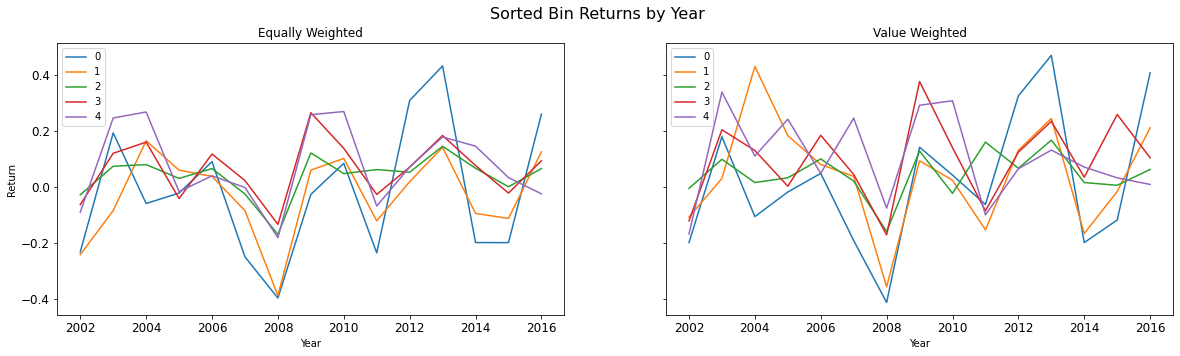

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,5), sharey=True)
eq_returns_df[:-1].plot(ax=ax[0], title='Equally Weighted', fontsize=12, xlabel='Year', ylabel='Return')
weighted_returns_df[:-1].plot(ax=ax[1], title='Value Weighted', fontsize=12, xlabel='Year', ylabel='Return')
plt.suptitle('Sorted Bin Returns by Year', fontsize=16)

## Building Long-short Portfolio

In [19]:
fama_french_annual['equal'] = eq_returns_df[long_bin] - eq_returns_df[short_bin] # Long the high bin, short the low bin
fama_french_annual['weighted'] = weighted_returns_df[long_bin] - eq_returns_df[short_bin] # Long the high bin, short the low bin
fama_french_annual.dropna(inplace=True)
fama_french_annual

,mkt_rf,smb,hml,rf,equal,weighted
year,,,,,,
2002,-0.2276,0.0445,0.0809,0.0165,0.178934,0.120794
2003,0.3075,0.2651,0.0511,0.0102,0.204792,0.288907
2004,0.1072,0.0443,0.0767,0.0120,-0.004895,-0.034713
2005,0.0309,-0.0236,0.0943,0.0298,-0.101427,-0.057147
2006,0.1060,0.0008,0.1175,0.0480,0.079830,0.146538
2007,0.0104,-0.0740,-0.1728,0.0466,0.107711,0.129750
2008,-0.3834,0.0245,0.0083,0.0160,0.254304,0.216879
2009,0.2826,0.0935,-0.0942,0.0010,0.205128,0.316670
2010,0.1737,0.1429,-0.0510,0.0012,0.036102,0.038585


# CAPM

In [20]:
from patsy import dmatrices
import statsmodels.api as sm

def regress(df, weight = 'equal', verbose=False):
    results = pd.DataFrame(columns=['weight','alpha', 'beta', 'shapre','t-stat', 'p-value'])
    if weight == 'equal':
        yvars = 'equal'
    elif weight == 'weighted':
        yvars = 'weighted'

    for mode in ['capm', 'fama-french']:
        if mode == 'capm':
            xvars = 'mkt_rf'
        elif mode == 'fama-french':
            xvars = 'mkt_rf + smb + hml'
        
        y, x = dmatrices(yvars+'~'+xvars, data=df)
        model = sm.OLS(y, x).fit()
        results.loc[mode] = [weight, model.params[0], model.params[1], np.round(y.mean()/y.std(), 2),model.tvalues[0], model.pvalues[0]]
        

        if mode == 'capm' and verbose:
            plt.figure(figsize=(10,5))
            plt.title('CAPM ('+weight.upper()+f'): α: {np.round(model.params[0], 2)}; ß: {np.round(model.params[1], 2)}', fontsize=12)
            plt.xlabel('Market Return')
            plt.ylabel('Return')
            plt.plot(df[xvars], df[yvars], 'o', label='Returns')
            plt.plot(df[xvars], model.fittedvalues, 'r--.', label='OLS', alpha=0.5, linewidth=2)
            plt.axvline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)
            plt.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)
            plt.legend(loc='best')
            plt.show()
    return results

# Results

In [21]:
pd.concat([regress(fama_french_annual, 'equal'), regress(fama_french_annual, 'weighted')])

,weight,alpha,beta,shapre,t-stat,p-value
capm,equal,0.101792,-0.150464,0.96,3.876127,0.001679
fama-french,equal,0.099635,-0.253925,0.96,4.346679,0.000950
capm,weighted,0.121647,-0.018870,0.99,3.378464,0.004502
fama-french,weighted,0.120137,-0.133255,0.99,3.603864,0.003620


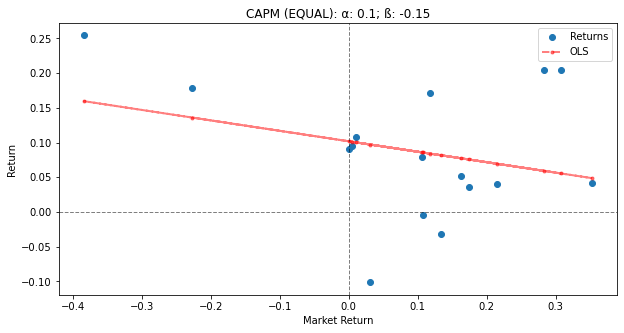

,weight,alpha,beta,shapre,t-stat,p-value
capm,equal,0.101792,-0.150464,0.96,3.876127,0.001679
fama-french,equal,0.099635,-0.253925,0.96,4.346679,0.000950


In [22]:
regress(fama_french_annual, 'equal', verbose=True)

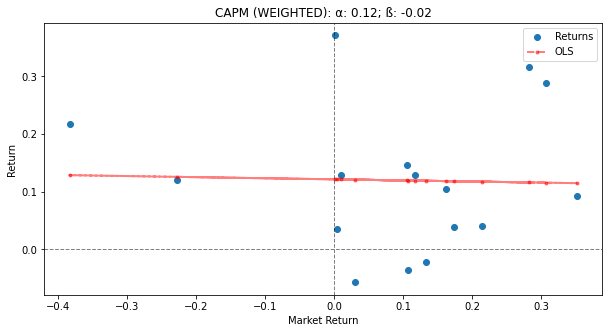

,weight,alpha,beta,shapre,t-stat,p-value
capm,weighted,0.121647,-0.018870,0.99,3.378464,0.004502
fama-french,weighted,0.120137,-0.133255,0.99,3.603864,0.003620


In [23]:
regress(fama_french_annual, 'weighted', verbose=True)

In [29]:
fama_french_annual.loc[2001,:] = 0.0
fama_french_annual.sort_index(inplace=True)
fama_french_annual

,mkt_rf,smb,hml,rf,equal,weighted
year,,,,,,
2001,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000
2002,-0.2276,0.0445,0.0809,0.0165,0.178934,0.120794
2003,0.3075,0.2651,0.0511,0.0102,0.204792,0.288907
2004,0.1072,0.0443,0.0767,0.0120,-0.004895,-0.034713
2005,0.0309,-0.0236,0.0943,0.0298,-0.101427,-0.057147
2006,0.1060,0.0008,0.1175,0.0480,0.079830,0.146538
2007,0.0104,-0.0740,-0.1728,0.0466,0.107711,0.129750
2008,-0.3834,0.0245,0.0083,0.0160,0.254304,0.216879
2009,0.2826,0.0935,-0.0942,0.0010,0.205128,0.316670


Text(0, 0.5, 'Return')

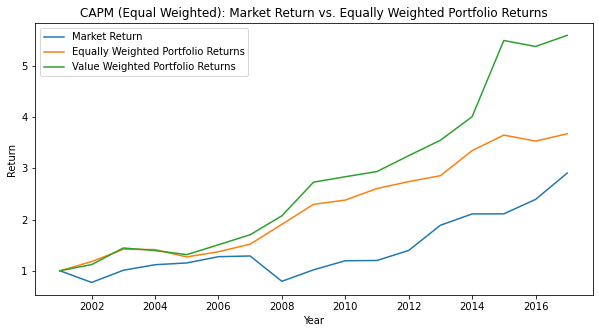

In [31]:
plt.figure(figsize=(10,5))
plt.plot((fama_french_annual.mkt_rf+1).cumprod(), label='Market Return')
plt.plot((fama_french_annual.equal+1).cumprod(), label='Equally Weighted Portfolio Returns')
plt.plot((fama_french_annual.weighted+1).cumprod(), label='Value Weighted Portfolio Returns')
plt.legend(loc = 'best')
plt.title('CAPM (Equal Weighted): Market Return vs. Equally Weighted Portfolio Returns', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Return')